In [ ]:
import os
from typing import Tuple, List
import torch 
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from common import DATA_DIR, TRAIN_DIR, TEST_DIR, IMG_SIZE, CLASS_NAMES, DEVICE, NUM_CLASSES, OUTPUT_MODELS_DIR, OUTPUT_PLOTS_DIR
from model.tumor_efficientnet import build_model, build_optimizer
from train.cnn_train import train_model
from data_loader import create_data_loaders

# constants
IMG_SIZE: Tuple[int, int] = (512, 512)
BATCH_SIZE: int = 32
VALID_SPLIT: float = 0.2
EPOCHS: int = 20
os.makedirs(OUTPUT_MODELS_DIR, exist_ok=True)

In [12]:
model = build_model(NUM_CLASSES, IMG_SIZE, DEVICE)
optimizer = build_optimizer(model)

In [13]:
train_loader, val_loader, test_loader = create_data_loaders(img_size=IMG_SIZE, batch_size=BATCH_SIZE, valid_split=VALID_SPLIT)

In [ ]:
history = train_model(model, train_loader, val_loader, optimizer=optimizer, epochs=EPOCHS)

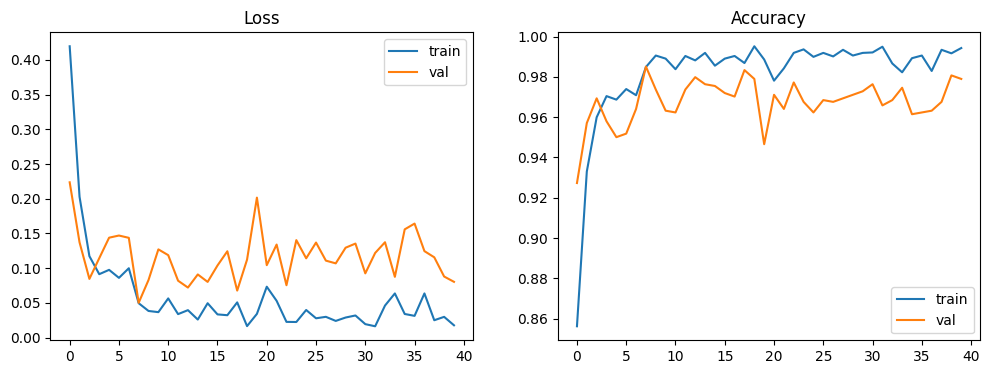

Test Loss: 0.1019
Test Accuracy: 0.9733


In [ ]:
from train.cnn_train import validate


def plot_history(history: dict[str, List[float]]) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    axes[0].plot(history["train_loss"], label="train")
    axes[0].plot(history["val_loss"], label="val")
    axes[0].set_title("Loss"); axes[0].legend()
    axes[1].plot(history["train_acc"], label="train")
    axes[1].plot(history["val_acc"], label="val")
    axes[1].set_title("Accuracy"); axes[1].legend()
    plt.show()

def test_evaluate(model: nn.Module,
                  loader: DataLoader
                  ) -> None:
    loss, acc = validate(model, loader, nn.CrossEntropyLoss())
    print(f"Test Loss: {loss:.4f}\nTest Accuracy: {acc:.4f}")

plot_history(history)
test_evaluate(model, test_loader)

In [ ]:
# usage
from train.save import save_experiment

default_remark = f"Image size: {IMG_SIZE}, Batch size: {BATCH_SIZE}, EPOCHS: {EPOCHS}"

save_experiment(
    model,
    history,
    OUTPUT_MODELS_DIR,
    save_full_model=True,
    export_torchscript=False,
    remark=f"Test EfficientNet CNN, {default_remark}"
)

Saving to: output\models\brain_tumor_mri_CNN_0001
